In [1]:
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
passenger = pd.read_csv("data\passengers.csv", index_col=0)
vals = passenger['num_passengers'].values

In [3]:
def Multiplicative_Additive_Seasonality(vals, h, m, alpha, beta, gamma, mod = 'Additive'):
    forecast = [vals[11]]
    level = vals[11]
    trend = np.mean(vals[12:24]) - np.mean(vals[:12])
    seasonality = (vals[:12] - np.mean(vals[:12])).tolist()

    for t in range(12, len(vals) + h):
        pred_level = level
        pred_trend = trend

        if t < len(vals):
            value = vals[t]
        else:
            value = forecast[-1]
            
        if mod == 'Additive':
        
            season = gamma * (value - pred_level - pred_trend) + (1 - gamma) * seasonality[t - m]
            seasonality.append(season)

            level = alpha * (value - seasonality[t - m]) + (1 - alpha) * (pred_level + pred_trend)
            trend = beta * (level - pred_level) + (1 - beta) * pred_trend
            forecast.append(level + trend + seasonality[t - m + 1])
            
        elif mod == 'Multiplicative':
            
            season = gamma * value/(pred_level + pred_trend) + (1 - gamma) * seasonality[t - m]
            seasonality.append(season)

            level = alpha * value/seasonality[t - m] + (1 - alpha) * (pred_level + pred_trend)
            trend = beta * (level - pred_level) + (1 - beta) * pred_trend
            forecast.append((level + trend) * seasonality[t - m + 1])
            
    return forecast

In [4]:
h=36
m=12
alpha=0.4
beta=0.03
gamma=0.75
mod = 'Additive'

forecast = Multiplicative_Additive_Seasonality(vals, h, m, alpha, beta, gamma, mod)

In [6]:
forecast

[118,
 134.784,
 158.14899200000002,
 160.962199296,
 154.93857728204802,
 168.96514114629224,
 185.74149777108323,
 191.01841377270483,
 181.93234240840536,
 166.39351148092481,
 148.6694907866654,
 159.01904448066978,
 154.40054816330436,
 160.92864379492542,
 174.02861344835893,
 175.80009040703874,
 169.33699747982615,
 201.55345834509356,
 217.68834879370274,
 215.41960334472088,
 203.63356135963596,
 180.41590310465517,
 165.60320963949496,
 191.7751742535271,
 189.6450884394314,
 189.1953519279609,
 212.05051628158373,
 189.6452167474437,
 194.10184382287366,
 198.64529318925,
 233.60245253288838,
 237.26082609924708,
 229.97293325238942,
 205.5618042200539,
 189.8755538827306,
 210.6056226831518,
 216.09697182082994,
 220.7424117028781,
 228.38944152649304,
 223.17454208723154,
 232.94461235833367,
 262.246897701478,
 263.1358568940839,
 273.4809988504486,
 242.99022477449245,
 228.1295866455409,
 207.64915843988297,
 224.02319791130924,
 222.85295829590981,
 223.0508050301329,

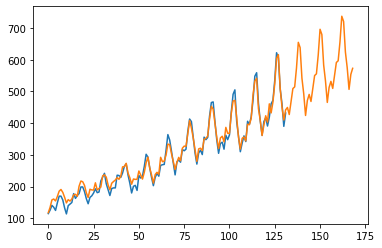

In [5]:
plt.plot(vals[12:])
plt.plot(forecast)

In [99]:
def mean_squar_error(vals, h, m, alpha, beta, gamma, mod = 'Additive'):
    forecast = Multiplicative_Additive_Seasonality(vals, h, m, alpha, beta, gamma, mod)
    return ((np.array(forecast[:-1]) - vals[12:])**2).mean()

In [112]:
h=0
mod = 'Additive'

mse = lambda x: mean_squar_error(vals, h, m, x[0], x[1], x[2], mode)
bnds = ( (0,1) for i in range(3) )
df = minimize(mse, (0,0,0), bounds = tuple(bnds))

In [113]:
params = ['alpha', 'beta', 'gamma']
dict_params = dict(zip(param, df.x))

In [114]:
h=36
mod = 'Additive'

forecast = Multiplicative_Additive_Seasonality(vals, h, m, dict_params['alpha'], dict_params['beta'], dict_params['gamma'], mod)

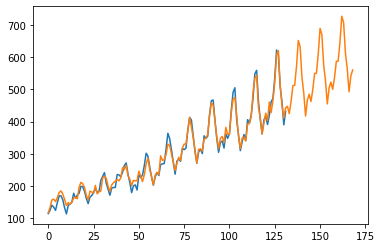

In [115]:
plt.plot(vals[12:])
plt.plot(forecast)

In [116]:
h=0
mod = 'Multiplicative'

mse = lambda x: mean_squar_error(vals, h, m, x[0], x[1], x[2], mode)
bnds = ( (0,1) for i in range(3) )
df = minimize(mse, (0,0,0), bounds = tuple(bnds))

In [117]:
params = ['alpha', 'beta', 'gamma']
dict_params = dict(zip(param, df.x))

In [118]:
h=36
mod = 'Multiplicative'

forecast = Multiplicative_Additive_Seasonality(vals, h, m, dict_params['alpha'], dict_params['beta'], dict_params['gamma'], mod)

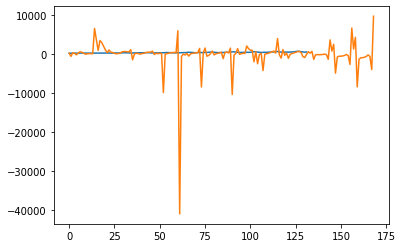

In [119]:
plt.plot(vals[12:])
plt.plot(forecast)